In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
dataset_train = pd.read_csv("Salestrain.csv")

In [3]:
dataset_train.shape

(96, 1)

In [5]:
dataset_train

,data
0,112
1,118
2,132
3,129
4,121
...,...
91,405
92,355
93,306
94,271


<function matplotlib.pyplot.show(close=None, block=None)>

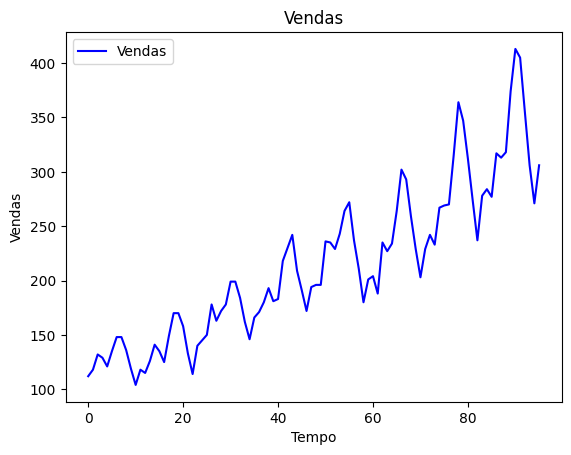

In [9]:
plt.plot(dataset_train, color = 'blue', label = 'Vendas')
plt.title('Vendas')
plt.xlabel('Tempo')
plt.ylabel('Vendas')
plt.legend()
plt.show

In [10]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(dataset_train)

In [12]:
X_train = []
y_train = []

for i in range(90, len(training_set_scaled)):
  data = training_set_scaled[i-90:i, 0]
  X_train.append(data)
  y_train.append(training_set_scaled[i, 0])

X_train = np.array(X_train).reshape(-1, 90, 1)
y_train = np.array(y_train)

In [13]:
modelo = Sequential()
modelo.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
modelo.add(Dropout(0.2))
modelo.add(LSTM(units = 100, return_sequences = True))
modelo.add(Dropout(0.2))
modelo.add(LSTM(units = 100, return_sequences = True))
modelo.add(Dropout(0.2))
modelo.add(LSTM(units = 100))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 1))

In [14]:
modelo.compile(optimizer = 'adam', loss = 'mean_squared_error')
modelo.fit(X_train, y_train, epochs = 300, batch_size = 1)

Epoch 1/300
6/6 [==============================] - 12s 129ms/step - loss: 0.3350
Epoch 2/300
6/6 [==============================] - 1s 125ms/step - loss: 0.0590
Epoch 3/300
6/6 [==============================] - 1s 120ms/step - loss: 0.0591
Epoch 4/300
6/6 [==============================] - 1s 199ms/step - loss: 0.0765
Epoch 5/300
6/6 [==============================] - 1s 201ms/step - loss: 0.0517
Epoch 6/300
6/6 [==============================] - 1s 162ms/step - loss: 0.0306
Epoch 7/300
6/6 [==============================] - 1s 125ms/step - loss: 0.0195
Epoch 8/300
6/6 [==============================] - 1s 118ms/step - loss: 0.0388
Epoch 9/300
6/6 [==============================] - 1s 123ms/step - loss: 0.0664
Epoch 10/300
6/6 [==============================] - 1s 135ms/step - loss: 0.0740
Epoch 11/300
6/6 [==============================] - 1s 109ms/step - loss: 0.0586
Epoch 12/300
6/6 [==============================] - 1s 114ms/step - loss: 0.0395
Epoch 13/300
6/6 [==================

In [15]:
dataset_test = pd.read_csv("Salestest.csv")

In [17]:
dataset_test.shape

(48, 1)

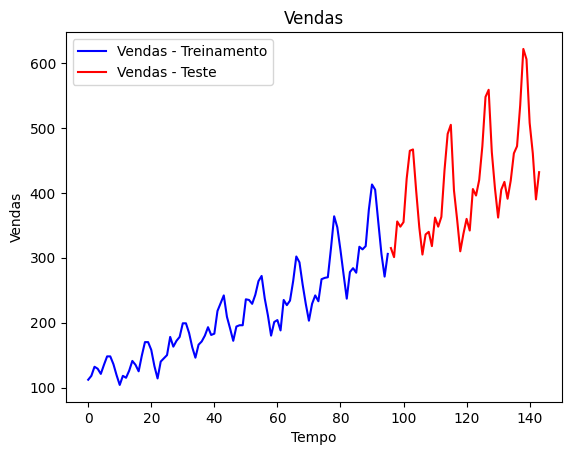

In [19]:
train_values = dataset_train['data'].values
test_values = dataset_test['data'].values
total_values = np.concatenate((train_values, test_values), axis = 0)
time_index = range(len(total_values))
plt.plot(time_index[:len(train_values)], train_values, color = 'blue', label = 'Vendas - Treinamento')
plt.plot(time_index[len(train_values): ], test_values, color = 'red', label = 'Vendas - Teste')
plt.title('Vendas')
plt.xlabel('Tempo')
plt.ylabel('Vendas')
plt.legend()
plt.show()

In [20]:
dataset_test_anomalies = dataset_test.copy()
dataset_test_anomalies.loc[:9, 'data'] = 90
dataset_test_anomalies.loc[10:34, 'data'] = np.random.uniform(100, 200, size = (25, ))
dataset_test_anomalies.loc[35:, 'data'] = 90

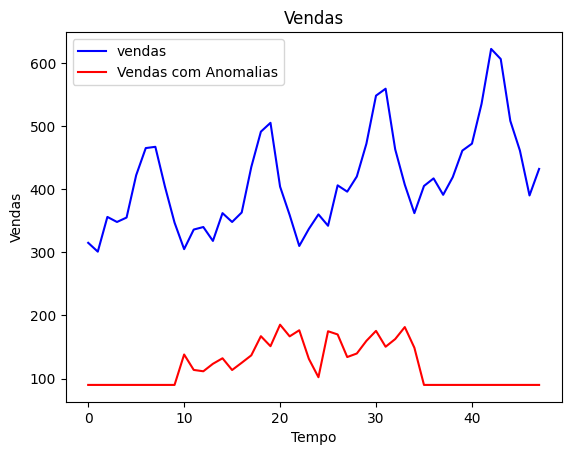

In [21]:
plt.plot(dataset_test, color = 'blue', label = 'vendas')
plt.plot(dataset_test_anomalies, color = 'red', label = 'Vendas com Anomalias')
plt.title('Vendas')
plt.xlabel('Tempo')
plt.ylabel('Vendas')
plt.legend()
plt.show()

In [30]:
dataset_total = pd.concat((dataset_train['data'], dataset_test['data']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 90:]
inputs = pd.DataFrame(inputs, columns = ['data'])
inputs = sc.transform(inputs)

In [31]:
dataset_total_anomalies = pd.concat((dataset_train['data'], dataset_test_anomalies['data']), axis = 0)
inputs_anomalies = dataset_total_anomalies[len(dataset_total_anomalies) - len(dataset_test_anomalies) - 90:]
inputs_anomalies = pd.DataFrame(inputs_anomalies, columns = ['data'])
inputs_anomalies = sc.transform(inputs_anomalies)

In [32]:
X_test = []
X_test_anomalies = []

for i in range(90, len(inputs)):
  X_test.append(inputs[i-90:i, 0])
  X_test_anomalies.append(inputs_anomalies[i-90:i, 0])

X_test, X_test_anomalies = np.array(X_test), np.array(X_test_anomalies)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test_anomalies = np.reshape(X_test_anomalies, (X_test_anomalies.shape[0], X_test_anomalies.shape[1], 1))

In [33]:
predicted_sales = modelo.predict(X_test)
predicted_sales = sc.inverse_transform(predicted_sales)

predicted_sales_anomalies = modelo.predict(X_test_anomalies)
predicted_sales_anomalies = sc.inverse_transform(predicted_sales_anomalies)

mes_test = mean_squared_error(test_values, predicted_sales)
mes_test_anomalies = mean_squared_error(test_values, predicted_sales_anomalies)

2/2 [==============================] - 0s 61ms/step


In [34]:
print(f'MSE para os dados normais: {mes_test}')
print(f'MSE para os dados com anomalias: {mes_test_anomalies}')

MSE para os dados normais: 5219.434287313081
MSE para os dados com anomalias: 14603.333539318051


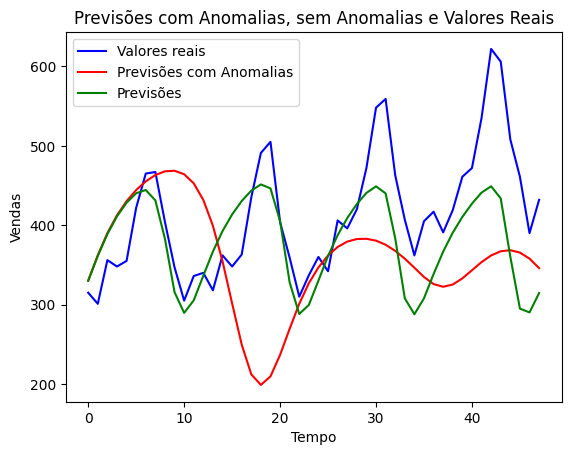

In [35]:
plt.plot(test_values, color = 'blue', label = 'Valores reais')
plt.plot(predicted_sales_anomalies, color = 'red', label = 'Previsões com Anomalias')
plt.plot(predicted_sales, color = 'green', label = 'Previsões')
plt.title('Previsões com Anomalias, sem Anomalias e Valores Reais')
plt.xlabel('Tempo')
plt.ylabel('Vendas')
plt.legend()
plt.show()